In [15]:
import numpy as np
import math

In [16]:
class LinearRegression:
    def __init__(self, X, y, lr=0.001, benchmark=0.00001, rho=0.9):
        self.X = X
        self.y = y
        self.lr = lr
        self.benchmark = benchmark
        self.rho = rho
        
        self.w = np.random.randn(self.X.shape[1])
    
    def predict(self, X):
        return np.dot(X, self.w)
    
    def error(self, X, y):
        return abs((self.predict(X) - y));
    
    def calc_grad(self, X, y):
        
        grads = np.dot(X.T, self.error(self.X, self.y))

        return grads
    
    def update_weights(self, grads):
        v = 0; # Momentum element
        
        
        for i in range(len(self.w)):
            v = v * self.rho - self.lr * grads[i]
            self.w[i] = self.w[i] + v
    
    def train(self):
        min_error = self.error(self.X, self.y).mean();
        
        cnt_err_bigger_than_pred = 0;
        
        while(True):
            self.update_weights(self.calc_grad(self.X, self.y))
            error = self.error(self.X, self.y).mean()
            
            if(min_error - error < self.benchmark): 
                cnt_err_bigger_than_pred += 1;
            else:
                min_error = error;
                cnt_err_bigger_than_pred = 0;
            
            if(cnt_err_bigger_than_pred > 10): break
            
        print("Min Error: ", min_error);
        print("Weights: ", self.w)
        

In [17]:
from sklearn.datasets import make_regression
X, y, coef = make_regression(
    n_samples=1000,
    n_features=1,
    n_informative=1,
    noise=10,
    coef=True,
    random_state=0,
)

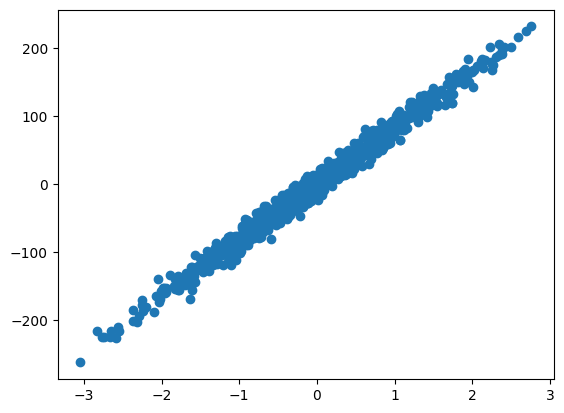

In [18]:
import matplotlib.pyplot as plt

plt.scatter(X, y)

In [19]:
model = LinearRegression(X=X, y=y, lr=0.001, benchmark=0.001, rho=0.9)

In [20]:
model.train()

Min Error:  7.87986408154062
Weights:  [86.16308896]


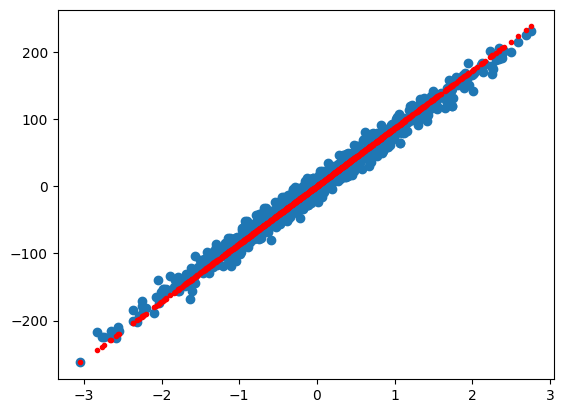

In [21]:
pred = model.predict(X)

plt.scatter(X, y)
plt.scatter(X, pred, marker='.', color='red')